In [1]:
import pandas as pd
import numpy as np

In [2]:
df  = pd.read_csv("abalone.csv")
df.head()

,Sex,Length,Width,Height,Total weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.Sex.value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [4]:
df.isnull().sum()

Sex               0
Length            0
Width             0
Height            0
Total weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
dtype: int64

In [5]:
sex_dict = {'M':0,'I':2,'F':4}
df['Sex'] = df['Sex'].map(sex_dict)
df.head()

,Sex,Length,Width,Height,Total weight,Shucked weight,Viscera weight,Shell weight,Age
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,4,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

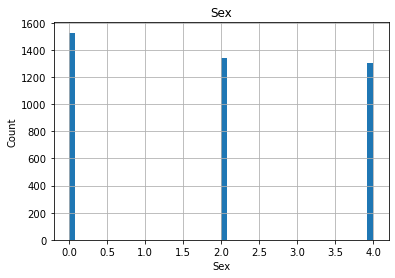

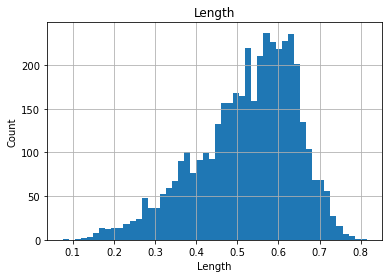

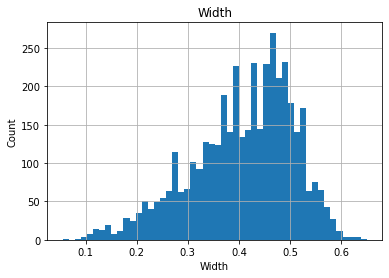

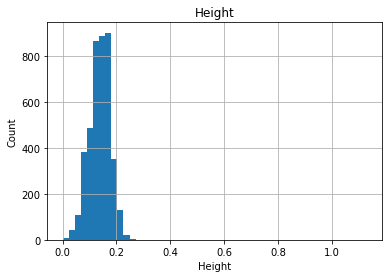

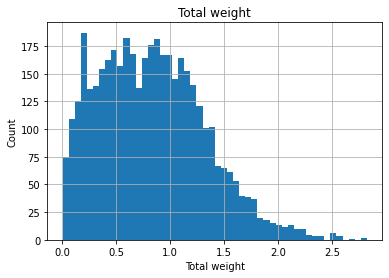

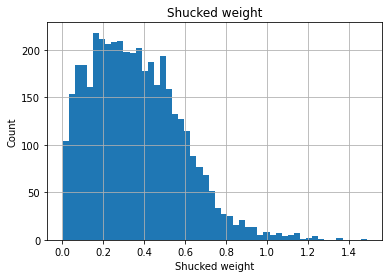

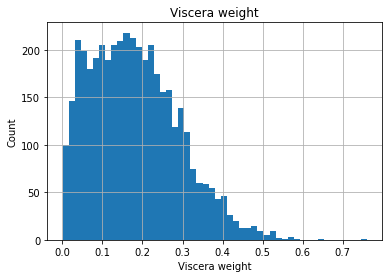

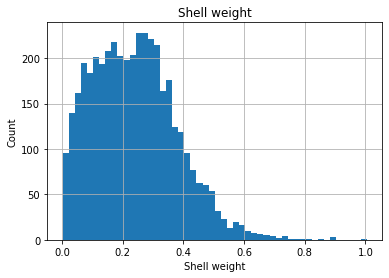

In [7]:
for feature in df.columns[0:-1]:
    data=df.copy()
    figure=df[feature].hist(bins=50)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

In [8]:
for feature in df.columns[:-1]:
    df[feature] =(df[feature])**(1/10)
    
df.head()

,Sex,Length,Width,Height,Total weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.000000,0.924275,0.904127,0.790264,0.935613,0.861235,0.795119,0.827197,15
1,0.000000,0.900341,0.875638,0.786003,0.861618,0.793930,0.738880,0.766496,7
2,1.148698,0.938486,0.916906,0.818528,0.961743,0.872788,0.822386,0.855504,9
3,0.000000,0.921182,0.904127,0.812252,0.935977,0.857718,0.804805,0.829914,10
4,1.071773,0.895058,0.872276,0.776800,0.853445,0.785565,0.723869,0.748232,7


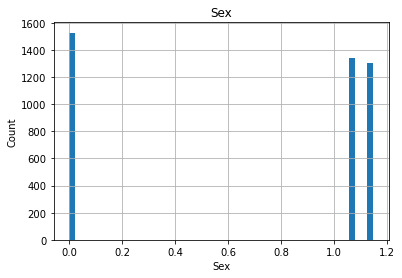

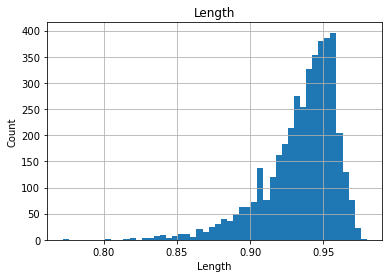

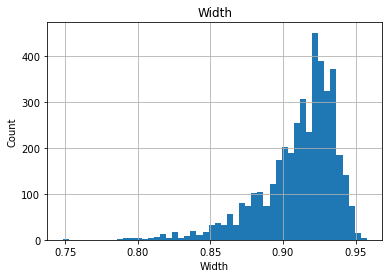

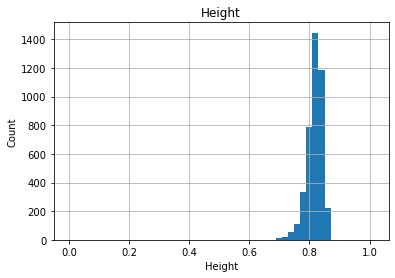

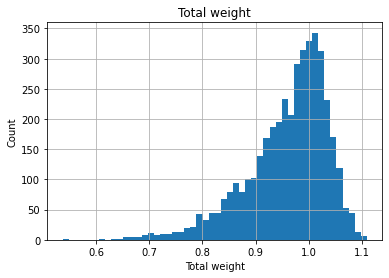

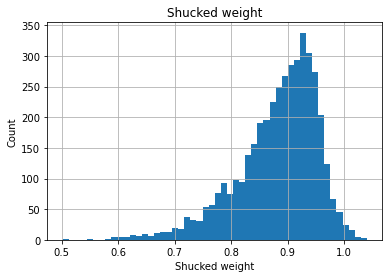

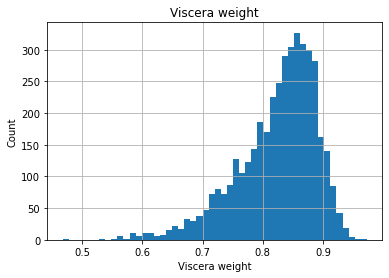

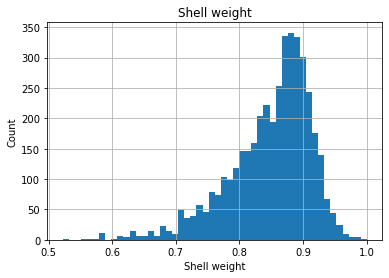

In [9]:
for feature in df.columns[0:-1]:
    data=df.copy()
    figure=df[feature].hist(bins=50)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

In [10]:

for feature in df.columns:
    IQR= df[feature].quantile(0.75) - df[feature].quantile(0.25)
    
    lower_bridge = df[feature].quantile(0.25)-(IQR*1.5)
    upper_bridge = df[feature].quantile(0.75)+(IQR*1.5)
    
    lower_bridge3 = df[feature].quantile(0.25)-(IQR*3)
    upper_bridge3 = df[feature].quantile(0.75)+(IQR*3)
    
    
    df.loc[df[feature]<=lower_bridge,feature] = lower_bridge
    df.loc[df[feature]>=upper_bridge,feature] = upper_bridge


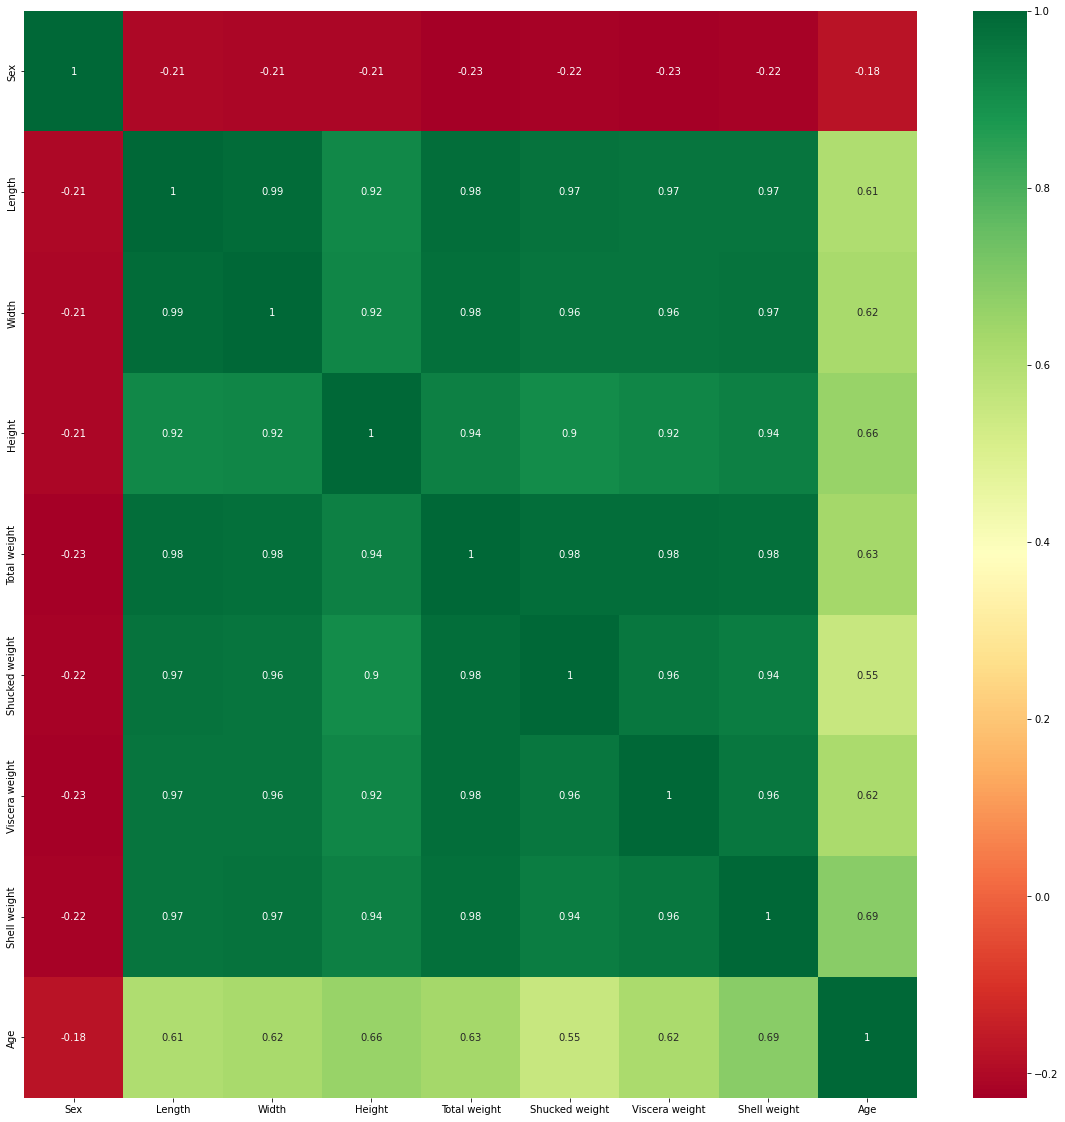

In [11]:
import seaborn as sns

#get correlations of each features in dataset
corrmat = df.corr()

top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [21]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [22]:
y

0       15.0
1        7.0
2        9.0
3       10.0
4        7.0
        ... 
4172    11.0
4173    10.0
4174     9.0
4175    10.0
4176    12.0
Name: Age, Length: 4177, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [27]:
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)

LinearRegression()

In [28]:
y_pred = reg.predict(X_test_scaled)

In [29]:
from sklearn.metrics import r2_score,mean_squared_error
print('accuracy =',np.round(r2_score(y_test, y_pred),3)*100,"%")
print("loss",mean_squared_error(y_test,y_pred))

accuracy = 58.9 %
loss 3.2072889070030457


In [30]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)

In [31]:
####Hyperparameters
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [32]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [33]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [34]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error',n_iter = 10, cv = 5, verbose=2, random_state=0)


In [35]:
rf_random.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   2.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   2.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   2.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   2.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   2.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   1.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   1.8s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_est

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=2)

In [39]:
rf_random.best_params_

{'n_estimators': 900,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30}

In [40]:
y_pred = rf.predict(X_test_scaled)

In [41]:
from sklearn.metrics import r2_score,mean_squared_error
print('accuracy =',np.round(r2_score(y_test, y_pred),3)*100,"%")
print("loss",mean_squared_error(y_test,y_pred))

accuracy = 60.0 %
loss 3.1213223265910974
